In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [443]:
# Import data
link = 'https://raw.githubusercontent.com/alango89/Python/main/Medical%20Data%20Visualizer/medical_examination.csv'
df = pd.read_csv(link)

In [444]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [445]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [447]:
#Add an overweight column to the data. To determine if a person is overweight, 
#first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1
#for overweight
df['overweight'] = None
BMI = (df['weight'] / (df['height']/100)**2)
df.loc[BMI > 25,'overweight'] = 1
df.loc[BMI <= 25,'overweight'] = 0
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [448]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df.loc[df['cholesterol'] == 1,'cholesterol'] = 0
df.loc[df['gluc'] == 1,'gluc'] = 0
df.loc[df['cholesterol'] > 1,'cholesterol'] = 1
df.loc[df['gluc'] > 1,'gluc'] = 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


<Figure size 640x480 with 0 Axes>

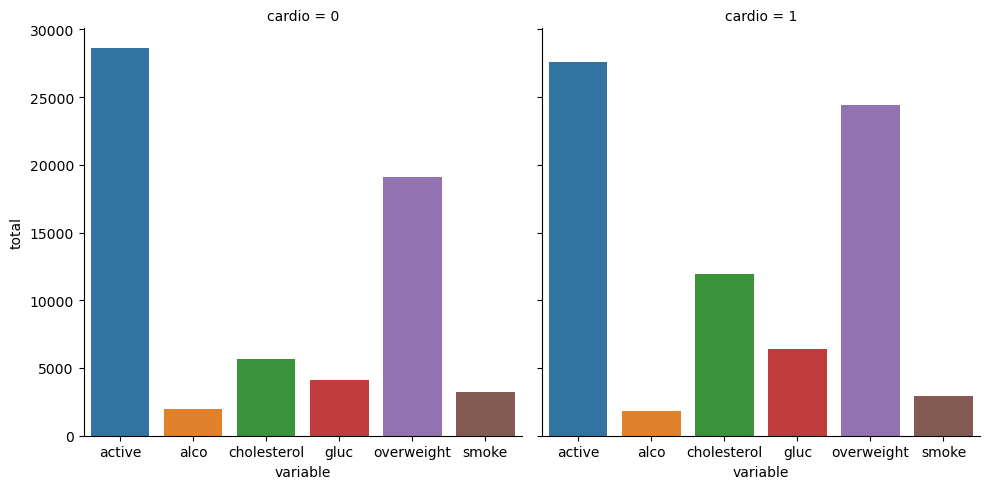

<Figure size 640x480 with 0 Axes>

In [463]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.rename(columns={'value': 'total'})
    df_group = df_cat.groupby(["cardio","variable"]).sum()
    df_group = df_group.reset_index()
    
    # Draw the catplot with 'sns.catplot()'
    sns.catplot(data=df_group, x='variable', y='total', col='cardio', kind='bar')
    plt.show()


    # Get the figure for the output
    fig = plt.gcf()


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig
draw_cat_plot()

/var/folders/hs/h6mhqdf94v97w25ww7x23l5r0000gn/T/ipykernel_71020/2284552548.py:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


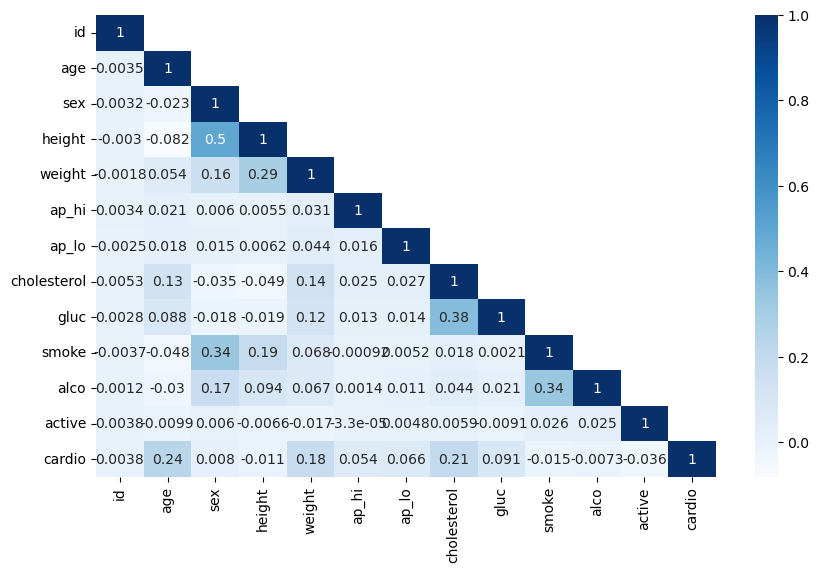

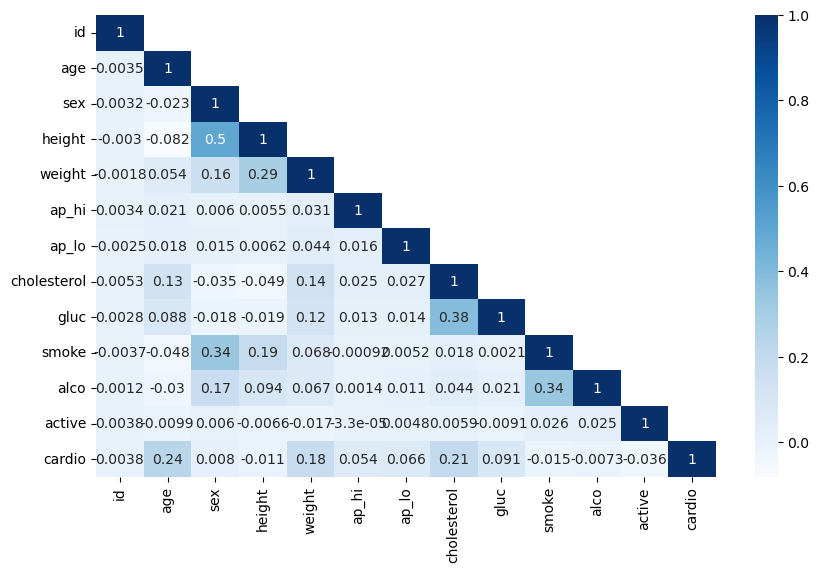

In [455]:
# Draw Heat Map
def draw_heat_map():
    #Clean the data. Filter out the following patient segments that represent incorrect data:
    #diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    #height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    #height is more than the 97.5th percentile
    #weight is less than the 2.5th percentile
    #weight is more than the 97.5th percentile
    mask1 = (df['ap_lo'] <= df['ap_hi'])
    mask2 = (df['height'] >= df['height'].quantile(0.025))
    mask3 = (df['height'] <= df['height'].quantile(0.975))
    mask4 = (df['weight'] >= df['weight'].quantile(0.025))
    mask5 = (df['weight'] <= df['weight'].quantile(0.975))
    df_heat = df.loc[mask1 & mask2 & mask3 & mask4 & mask5]
    
    # Calculate the correlation matrix
    corr = df.corr()
    
    # Generate a mask for the upper triangle
    #1. Creo una matriz con 0 del mismo tamaño que mi matriz anterior (corr).
    mask = np.zeros_like(corr, dtype=np.bool)

    #2. Configuro la parte superior del triángulo (excluyendo la diagonal principal) de la matriz de ceros como True
    mask[np.triu_indices_from(mask, k=1)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, mask=mask, cmap='Blues')
    plt.show()


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()

In [456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = None
df['overweight'] = None
BMI = (df['weight'] / (df['height']/100)**2)
df.loc[BMI > 25,'overweight'] = 1
df.loc[BMI <= 25,'overweight'] = 0
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1,'cholesterol'] = 0
df.loc[df['gluc'] == 1,'gluc'] = 0
df.loc[df['cholesterol'] > 1,'cholesterol'] = 1
df.loc[df['gluc'] > 1,'gluc'] = 1


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.rename(columns={'value': 'total'})
    df_cat = df_cat.groupby(["cardio","variable"]).sum()
    df_cat = df_cat.reset_index()
    

    # Draw the catplot with 'sns.catplot()'
    sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar')
    plt.show()


    # Get the figure for the output
    fig = plt.gcf()


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    mask1 = (df['ap_lo'] <= df['ap_hi'])
    mask2 = (df['height'] >= df['height'].quantile(0.025))
    mask3 = (df['height'] <= df['height'].quantile(0.975))
    mask4 = (df['weight'] >= df['weight'].quantile(0.025))
    mask5 = (df['weight'] <= df['weight'].quantile(0.975))
    df_heat = df.loc[mask1 & mask2 & mask3 & mask4 & mask5]

    # Calculate the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
  
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, annot=True, mask=mask, cmap='Blues')
    plt.show()

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
